# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')
bodytemp = df['temperature']

1.  Is the distribution of body temperatures normal?

The dataset has been presented graphically below with three graphs:  A Histogram, Swarmplot and Empirical Cumulative Distribution Function (ecdf).  Also the mean and median temperatures are very close: 98.25 and 98.3 respectively.  The distribution of the sample appears normal.here.

In [3]:
print("Mean Temperature:", round(np.mean(bodytemp), 2))
print("Median Temperature:", np.median(bodytemp))
print("Temperature Standard Deviation:", round(np.std(bodytemp), 2))
print("n = 130")

Mean Temperature: 98.25
Median Temperature: 98.3
Temperature Standard Deviation: 0.73
n = 130


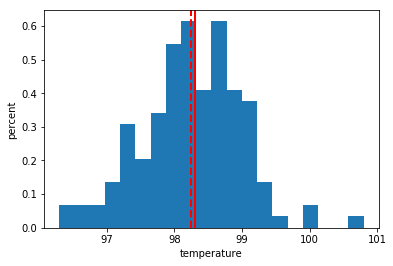

Body Temperature Mean: 98.24923076923078
Median Temperature: 98.3


In [4]:
_ = plt.hist(bodytemp, density=True, bins = 20)
_ = plt.xlabel('temperature')
_ = plt.ylabel('percent')
_ = plt.axvline(np.mean(bodytemp), color='r', linestyle='dashed', linewidth=2)
_ = plt.axvline(np.median(bodytemp), color='r', linestyle = 'solid', linewidth=2)

plt.show()
print("Body Temperature Mean:", np.mean(bodytemp))
print("Median Temperature:", np.median(bodytemp))

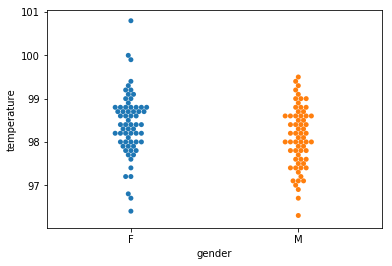

In [5]:
sns.swarmplot(x='gender', y='temperature', data=df)

2.  Is the sample size large?  Are the observations independent?  According to the Central Limit Theorum, sample sizes over 30 can be considered to be large enough to determine normality.  This sample size is 130 individuals.  The observations are independent because the temperature of one person does not impact the temperature of another person.

3.  Is the true population mean really 98.6 degrees F?  We can test the null hypothesis $H_{0}$ that the mean is 98.6 degrees F.  The alternative hypothesis, $H_{alt}$ is that the mean is not 98.6 degrees F.

Below is a bootstrap hypothesis test where 10,000 random samples are generated from the original 130 data points and the mean calculated for each.  Of the 10,000 samples, 49.67% were greater or equal to 98.6, well within one standard deviation from the sample mean of 98.25.  The null hypothesis is not rejected.

In [43]:
### Bootstrap replication
bs_replicates = np.empty(10000)

def bootstrap_replicate_id(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_id(bodytemp, np.mean)
    
p=np.sum(bs_replicates <= 98.6)/10000

print("p = ", p)

p =  1.0


### Frequentist Statistical Testing
#### Two tail z test:  This is a two tail test because the real mean temperature could be higher or lower than 98.6.
#### The z test is used because 130 samples is larger than 30, the cutoff for a t test.

z = sample mean - population mean / (standard deviation/sqrt of the sample size)

$\ z = \frac{98.3-98.6}{\frac{.73}{\sqrt{130}}}$

z = -5

The probability of having a t score of -5 at 129 df is 0.0000


5.  At what temperature should we consider someone's temperature to be abnormal?  A temperature is abnormal when it is more than two standard deviations away from the mean.  With a sample mean of 98.3 and a standard deviation of .73, an abnormal temperature would be less than 97.6 or greater than 99.0.

6.  Is there a significant difference between males and females in normal temperature?  $H_{0}$ is that female mean equals male mean.  $H_{alt}$ is that they don't.  I desided to use 10000 bootstrap replicants to model male and female temperature distributions.  The female mean temperature is 98.4 degrees and the male mean temperature is 98.1.

In [13]:
female_temps = df['gender'] == 'F'
male_temps = df['gender'] == 'M'

female_records = df[female_temps]
male_records = df[male_temps]

empirical_diff_mean = np.mean(female_records['temperature']) - np.mean(male_records['temperature'])

print("female sample mean:", np.mean(female_records['temperature']))
print("male sample mean:", np.mean(male_records['temperature']))

bs_replicates_f = np.empty(10000)
bs_replicates_m = np.empty(10000)

for i in range(10000):
    bs_replicates_f[i] = bootstrap_replicate_id(female_records['temperature'], np.mean)

for i in range(10000):
    bs_replicates_m[i] = bootstrap_replicate_id(male_records['temperature'], np.mean)

female sample mean: 98.39384615384613
male sample mean: 98.1046153846154


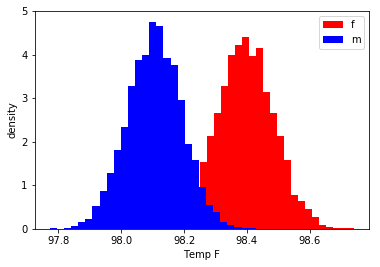

In [32]:
_ = plt.hist(bs_replicates_f, color = 'r', bins = 30, density=True, label='female')
_ = plt.hist(bs_replicates_m, color = 'blue', bins = 30, density=True, label='male')
_ = plt.xlabel('Temp F')
_ = plt.ylabel('density')
_ = plt.legend('fm')
plt.show()

In [34]:
bs_replicates = bs_replicates_m - bs_replicates_f

p = np.sum(bs_replicates >= (np.mean(bs_replicates_m)-np.mean(bs_replicates_f)))/len(bs_replicates)

print("p = :", p)

p = : 0.5035


Although there is a visible difference between the distributions of the results of the bootstrap modeling there is sufficient overlap to convey that the difference is not statistically siginificant.  The p value of .5035 is not small enough to reject the null hypothesis.
